In [5]:
selected_datasets = [
                        'ESOL',
                        'FreeSolv',
                        'lipophilicity',
                         'qm7',
                         'qm8',
                        'BACE',
                        'hiv',
                        'BBBP',
                        'tox21',
                        'toxcast',
                        'clintox',
                        'sider',
                    ]

In [6]:
selected_datasets_lower = [x.lower() for x in selected_datasets]

In [8]:
import os
import pandas as pd 

results_df = pd.DataFrame(columns=['Dataset', 'Mean Result', 'Stddev Result'])

base_path = '/tf/GraphMAE-pyg - copy/chem/results10'
file = 'finetune+recon_scaffold'

for dataset in selected_datasets_lower:
    # file_name = 'pretrained_gin_{}_scaffold_random_masking_{}.csv'.format(dataset,file)
    # file_name = 'pretrained_gin_{}_balanced_scaffold{}.csv'.format(dataset,file)
    # file_name = 'pretrained_gin_{}_balanced_scaffold{}.csv'.format(dataset,file)
    file_name = '{}_{}.csv'.format(dataset,file)
    
    file_path = os.path.join(base_path ,file_name)
    
    
    if os.path.isfile(file_path):
        print(file_path)
        
        # Load the CSV file
        temp_df  = pd.read_csv(file_path)
        
        # Group by 'ratio' and calculate the mean and std for 'result'
        grouped = temp_df.groupby('alpha').agg({'result': ['mean', 'std']}).reset_index()
        grouped.columns = ['alpha', 'Mean Result', 'Stddev Result']  # Flatten MultiIndex
        
        # Add the dataset column to the grouped DataFrame
        grouped['Dataset'] = dataset
        
        # Concatenate the grouped data with the results_df
        results_df = pd.concat([results_df, grouped[['Dataset', 'alpha', 'Mean Result', 'Stddev Result']]], ignore_index=True)
    else:
        print(f"{file_path} 파일이 존재하지 않습니다.")

# 최종 결과 출력
print(results_df)


## 기본 결과

/tf/GraphMAE-pyg - copy/chem/results10/esol_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/freesolv_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/lipophilicity_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/qm7_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/qm8_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/bace_finetune+recon_scaffold.csv


/tmp/ipykernel_2405566/2609976270.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, grouped[['Dataset', 'alpha', 'Mean Result', 'Stddev Result']]], ignore_index=True)


/tf/GraphMAE-pyg - copy/chem/results10/hiv_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/bbbp_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/tox21_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/toxcast_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/clintox_finetune+recon_scaffold.csv
/tf/GraphMAE-pyg - copy/chem/results10/sider_finetune+recon_scaffold.csv
    Dataset  Mean Result  Stddev Result         alpha
0      esol     1.468300       0.058549  1.000000e-07
1      esol     1.506240       0.119184  1.000000e-06
2      esol     1.501719       0.023639  1.000000e-05
3      esol     1.404945       0.055051  1.000000e-04
4      esol     1.453249       0.037508  1.000000e-03
..      ...          ...            ...           ...
103   sider     0.583261       0.008476  1.000000e-03
104   sider     0.592875       0.014489  1.000000e-02
105   sider     0.565573       0.007451  1.000000e-01
106   sider     0.566

In [9]:
results_df.to_csv('./grouped_results_by_alpha.csv', index=False)

In [10]:
results_df

,Dataset,Mean Result,Stddev Result,alpha
0,esol,1.468300,0.058549,1.000000e-07
1,esol,1.506240,0.119184,1.000000e-06
2,esol,1.501719,0.023639,1.000000e-05
3,esol,1.404945,0.055051,1.000000e-04
4,esol,1.453249,0.037508,1.000000e-03
...,...,...,...,...
103,sider,0.583261,0.008476,1.000000e-03
104,sider,0.592875,0.014489,1.000000e-02
105,sider,0.565573,0.007451,1.000000e-01
106,sider,0.566642,0.009678,5.000000e-01


In [5]:
# 각 데이터셋에 대해 mask_rate = 0 일 때의 값을 저장하는 딕셔너리
zero_mask_values = {
    'freesolv': 2.8178,
    'esol': 1.4305,
    'lipophilicity': 0.8170,
    'qm7' : 99.1721,
    'qm8':0.018608,
    
    'bace':0.7269,
    'bbbp':0.6902,
    'sider':0.5789,
    'tox21':0.7507,
    'toxcast':0.6270,
    'clintox':0.6230,
    'hiv':0.7585
}
# mask_rate = 0 항목 추가
new_rows = []
for dataset in selected_datasets_lower:
    zero_mask_mean = zero_mask_values.get(dataset, None)
    zero_mask_std = 0  # 필요에 따라 적절한 값을 설정
    
    zero_mask_row = {'Ratio': 0, 'Mean Result': zero_mask_mean, 'Stddev Result': zero_mask_std, 'Dataset': dataset}
    new_rows.append(zero_mask_row)

# 새로운 행들을 데이터프레임으로 변환 후 기존 결과 데이터프레임에 추가
new_rows_df = pd.DataFrame(new_rows)
results_df = pd.concat([results_df, new_rows_df], ignore_index=True)

results_df = results_df.sort_values(by=['Dataset', 'Ratio']).reset_index(drop=True)

bace


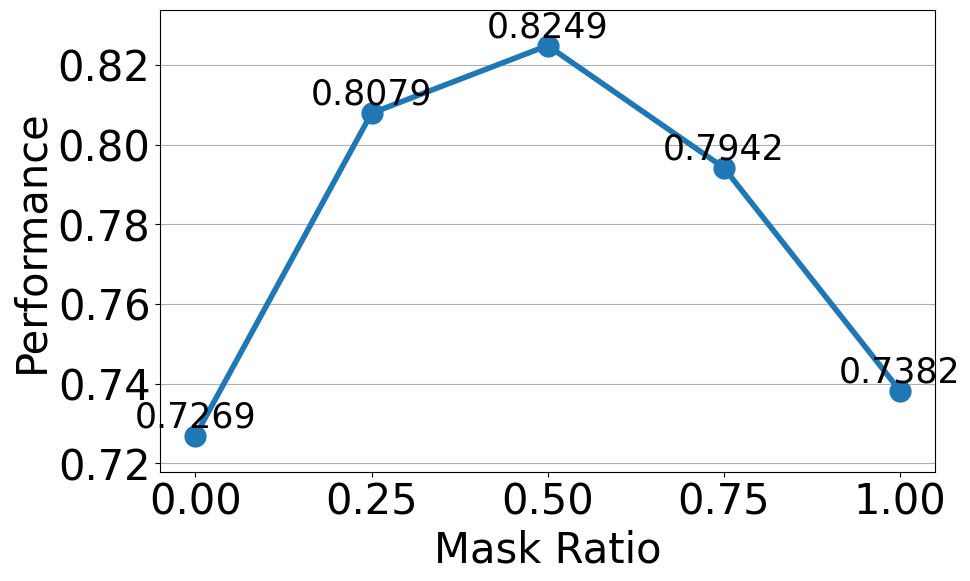

bbbp


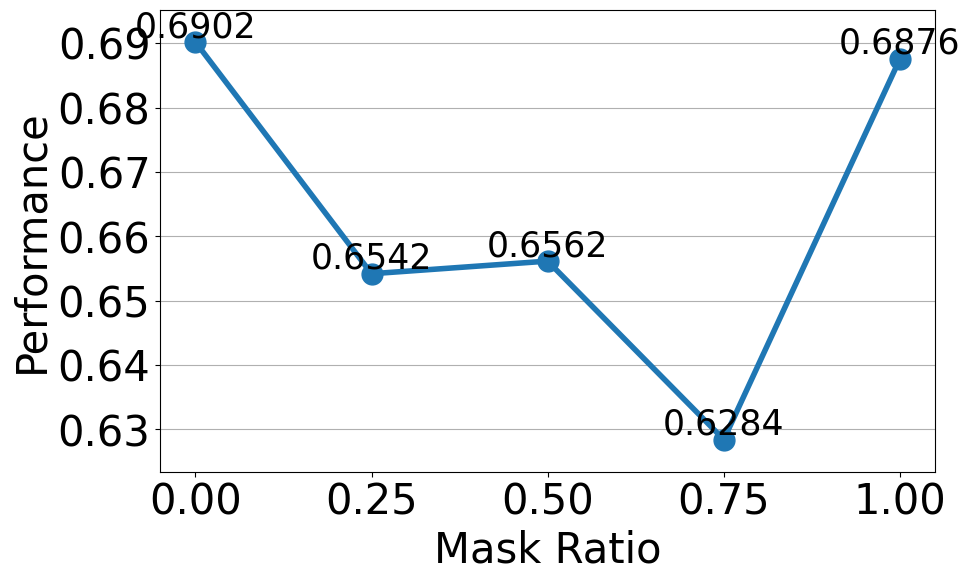

clintox


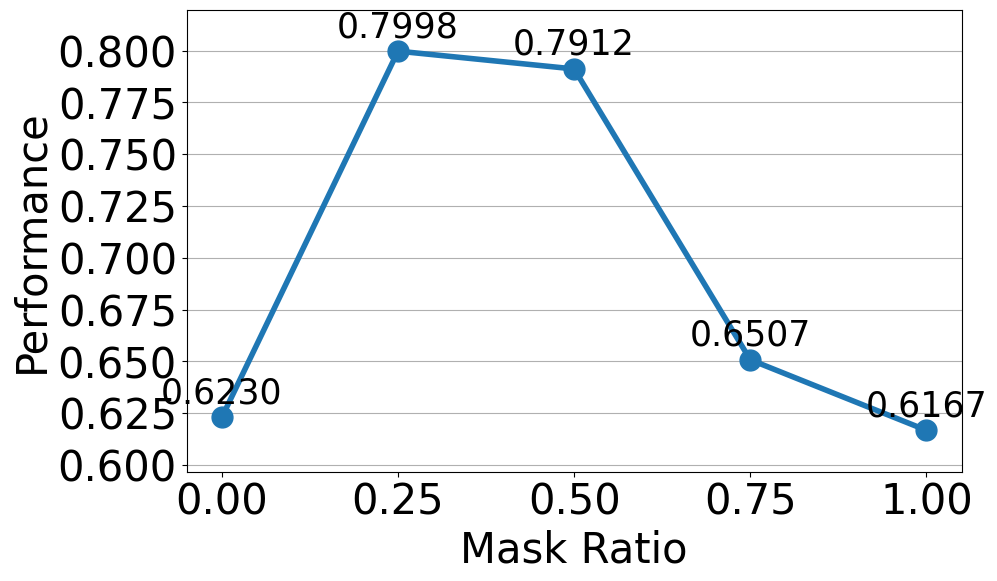

esol


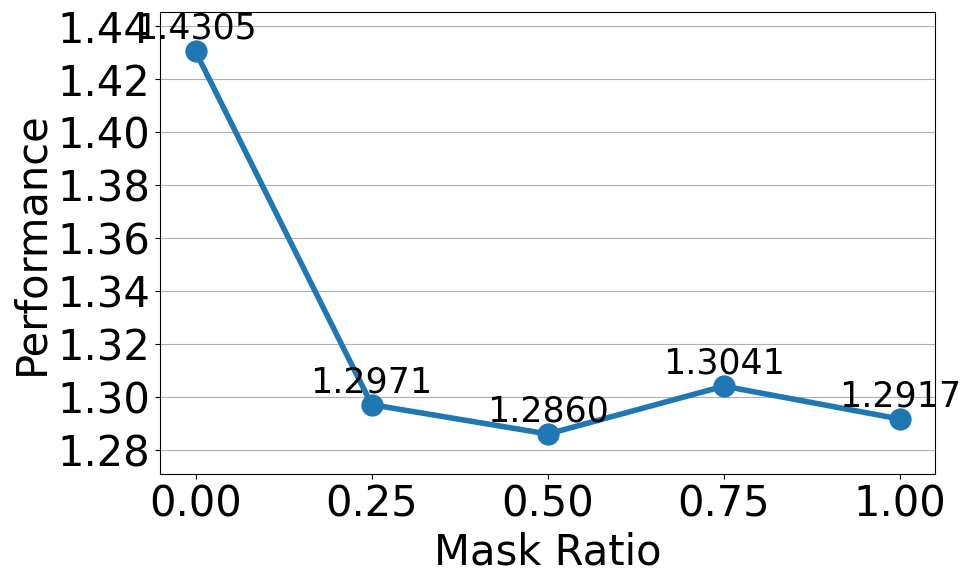

freesolv


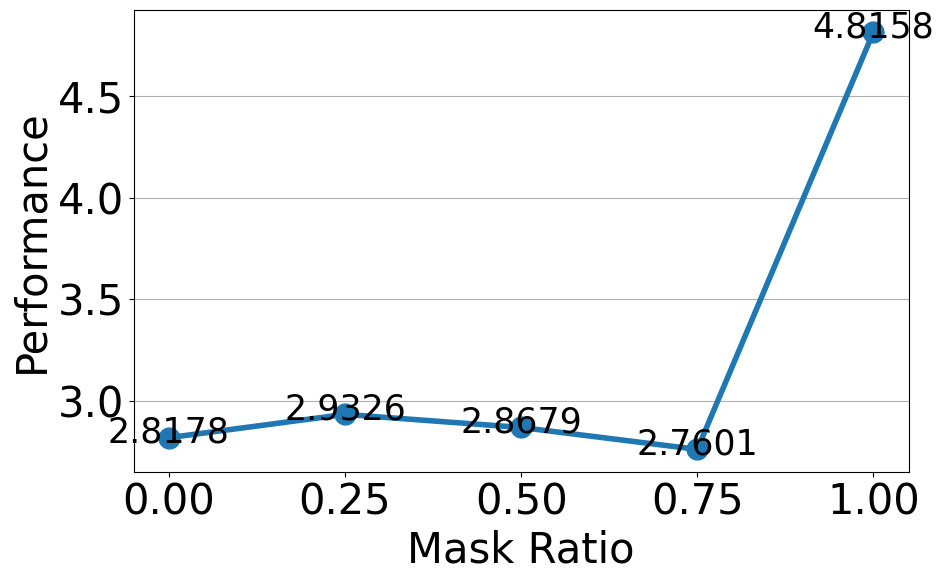

hiv


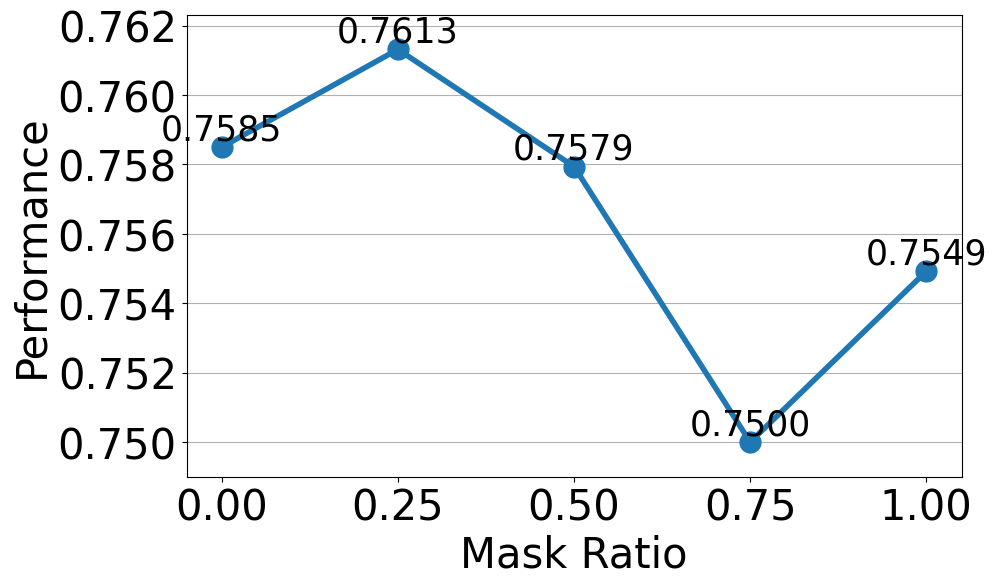

lipophilicity


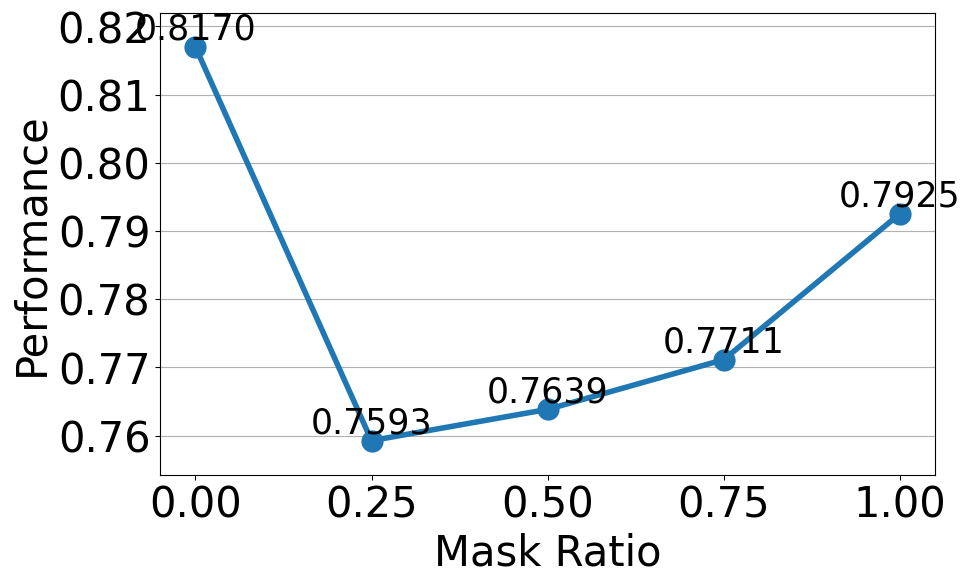

qm7


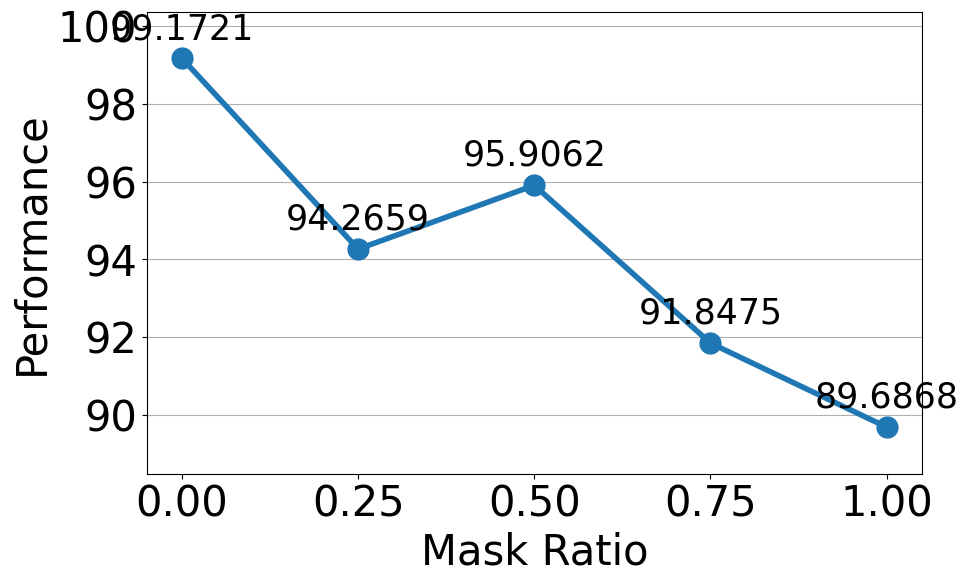

qm8


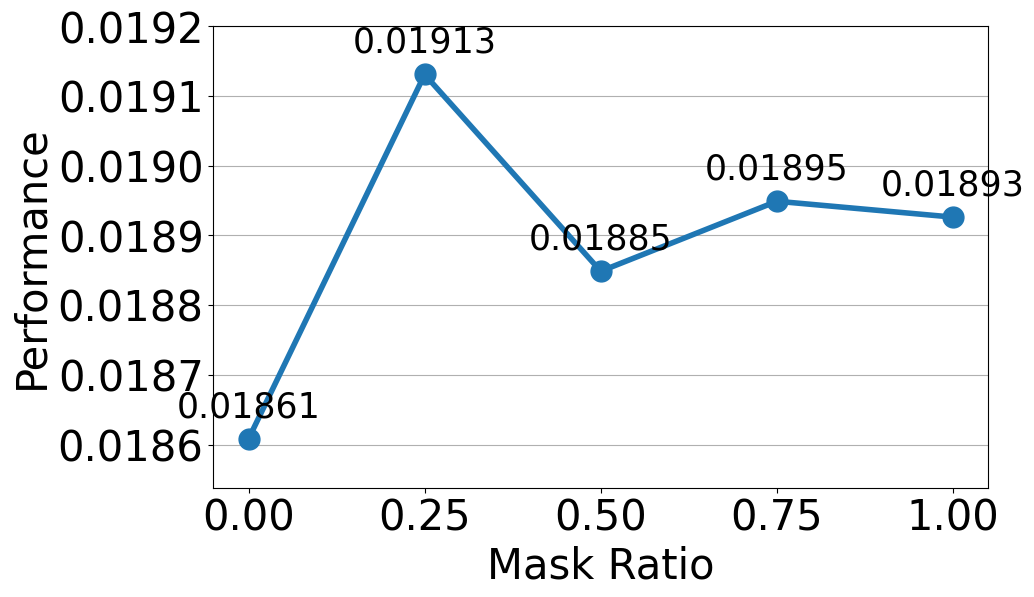

sider


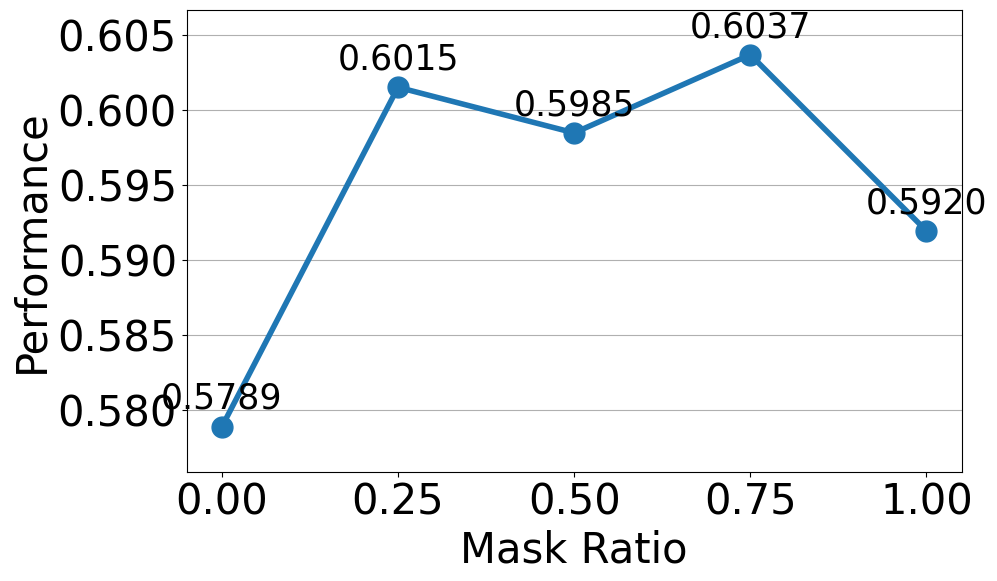

tox21


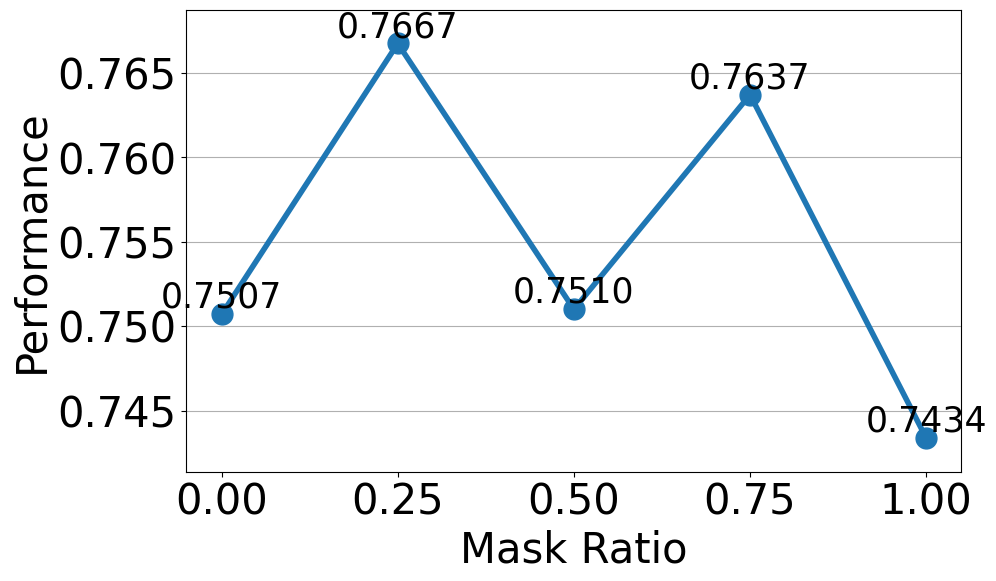

toxcast


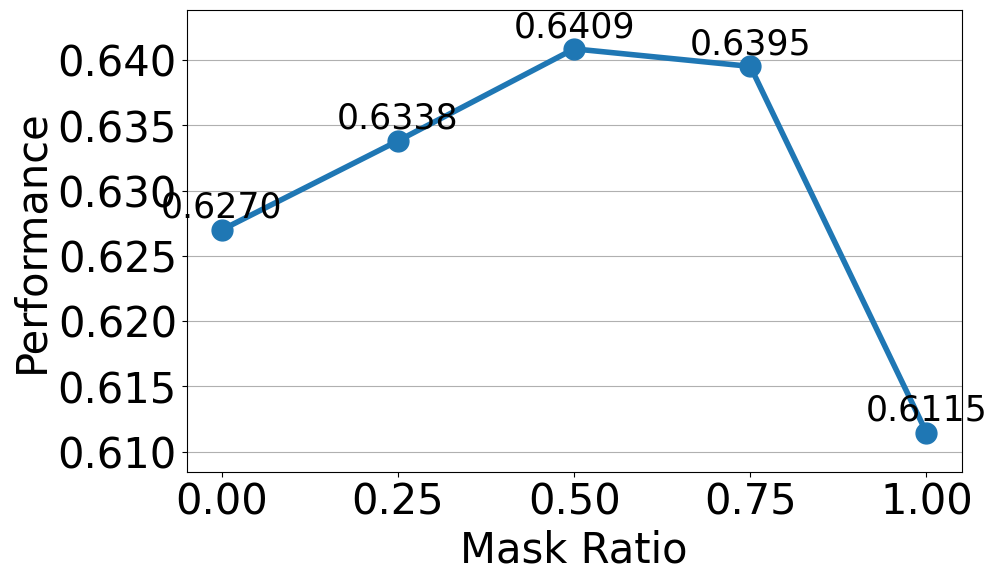

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results_df)
# 그룹화하여 각 데이터셋에 대한 꺾은선 그래프 그리기
for name, group in df.groupby('Dataset'):
    
    print(name)
    
    plt.figure(figsize=(10, 6))
    plt.plot(group['Ratio'], group['Mean Result'], marker='o', markersize=15, linewidth = 4)
    # plt.title(f'Mean Result by Mask Rate for {name}')  # 제목 활성화
    plt.xlabel('Mask Ratio',fontsize= 30)
    plt.ylabel('Performance', fontsize= 30)

    add_y = {'bace': 0.009, 'bbbp': 0.005,  'clintox': 0.02, 'sider': 0.003, 'hiv': 0.001, 'toxcast': 0.003, 'tox21': 0.002,
             'esol': 0.015, 'freesolv': 0.11, 'qm7': 1.2, 'qm8': 0.00007, 'lipophilicity': 0.005 }

    for x, y in zip(group['Ratio'], group['Mean Result']):
        if name == 'qm8':
            plt.text(x, y + add_y[name], f'{y:.5f}', color='black', ha='center', va='top', size=25)
        else:
            plt.text(x, y + add_y[name], f'{y:.4f}', color='black', ha='center', va='top', size=25)

    y_min = group['Mean Result'].min() - add_y[name] 
    y_max = group['Mean Result'].max() + add_y[name] 
    plt.ylim(y_min, y_max)

    plt.xticks([0.00, 0.25, 0.50, 0.75, 1.00], fontsize=30)
    plt.yticks(fontsize=30)
    plt.grid(True, axis='y')
    # plt.savefig(f"./ratio/{name}_plot.png", dpi=600, bbox_inches='tight')  # 파일 형식, 해상도 및 경계 조정 옵션 포함
    
    plt.show()
